<a href="https://colab.research.google.com/github/moebarati/CLS_Final_Project/blob/main/gen_corpus_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####### IMPORTING AND DOWNLOADING THE NECESSARY LIBARARIES AND MODULES
import pandas as pd
import re
import numpy as np
import seaborn as sn
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from zipfile import ZipFile
from google.colab import drive

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

drive.mount('/content/gdrive')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
colors = ['yellow', 'beige', 'cadet blue', 'royal blue', 'denim', 'slate blue', 'honeydew', 'dark slate gray', 'taffy', 'plum', 'artichoke', 'dijon',
          'cornsilk', 'pineapple', 'royal', 'lemon chiffon', 'indian red', 'shadow', 'coffee', 'gold', 'mocha', 'tiger', 'white', 'syrup', 'wheat',
          'orange red', 'fuchsla', 'pine', 'flamingo', 'space', 'emerald', 'ghost white', 'electric', 'magenta', 'tortilla', 'azure', 'sea', 'pigeon',
          'dark orange', 'floral white', 'sky blue', 'whitesmoke', 'chilli', 'green', 'laurel', 'light grey', 'gainsboro', 'light sea green', 'olive',
          'trombone', 'green yellow', 'yale', 'coral', 'old lace', 'light sky blue', 'chocolate', 'lemonade', 'bronze', 'walnut', 'pale goldenrod', 'baby',
          'barn', 'wood', 'dark violet', 'silver', 'mink', 'pecan', 'raspberry', 'rose', 'pearl', 'khaki', 'cerise', 'tawny', 'pewter', 'air force',
          'hickory', 'medium turquoise', 'moccasin', 'trout', 'anchor', 'medium sea green', 'army', 'carmine', 'redwood', 'mulberry', 'sky', 'punch',
          'espresso', 'ultra', 'thunder', 'mellow', 'dodger blue', 'sepia', 'dark turquoise', 'turkish', 'navy', 'carmel', 'amethyst', 'tangerine',
          'sea shell', 'bumblebee', 'sangria', 'medium aquamarine', 'cedar', 'fossil', 'egyptian', 'ash', 'rust', 'fire', 'honey', 'laguna', 'ferrari',
          'cinnamon', 'mint', 'steel blue', 'light coral', 'lemon', 'spice', 'saddle brown', 'sage', 'persian', 'forest green', 'midnight blue', 'misty rose',
          'creamy', 'charcoal', 'french', 'tuscany', 'peru', 'peach puff', 'moss', 'indian', 'lavender blush', 'african', 'hot pink', 'mint cream', 'peach',
          'teal', 'jade', 'dark blue', 'olive drab', 'mauve', 'ruby', 'dark goldenrod', 'thulian', 'rhino', 'prussian', 'iron', 'olympic', 'blanched almond',
          'navajo white', 'lime', 'flaxen', 'dark olive green', 'jungle', 'fern', 'carolina', 'ochre', 'indigo', 'light yellow', 'fuchsia', 'cornflower',
          'tea', 'mustard', 'blue violet', 'fire brick', 'burnt', 'firebrick', 'clay', 'russet', 'carrot', 'hunter', 'sapphire', 'black', 'lawn green',
          'light blue', 'purple', 'turquoise', 'pale green', 'seagreen', 'medium spring green', 'harbour', 'antique white', 'hibiscus', 'apricot',
          'medium blue', 'light cyan', 'steel', 'dark khaki', 'dark magenta', 'seal', 'floral', 'banana', 'maya', 'helio', 'dark seagreen', 'lava',
          'light salmon', 'alice blue', 'medium violet red', 'byzantine', 'cyan', 'imperial', 'pale violet red', 'tomato', 'sacramento', 'bubblegum',
          'dark red', 'dark green', 'independence', 'sienna', 'brunette', 'apple', 'peanut', 'linen', 'pink', 'grape', 'dark gray', 'gray', 'pale turquoise',
          'thistle', 'brick', 'medium slate blue', 'amber', 'yellow green', 'aquamarine', 'umber', 'ecru', 'red', 'cream', 'tan', 'salmon', 'deep pink',
          'rosy brown', 'spring green', 'dark salmon', 'powder blue', 'dark cyan', 'stone', 'fandango', 'abalone', 'orchid', 'maroon', 'light goldenrod yellow',
          'dark orchid', 'violet', 'lime green', 'mahogany', 'ivory', 'orange', 'burgundy', 'bisque', 'burlywood', 'dark slate blue', 'blue', 'dim gray',
          'light pink', 'goldenrod', 'papaya whip', 'carnation', 'light steel blue', 'pumpkin', 'USA flag', 'smoke', 'light green', 'light slate gray',
          'medium orchid', 'chartreuse', 'aqua', 'kelly', 'cornflower blue', 'scarlet', 'forest', 'crimson', 'lavender', 'amaranth', 'deep sky blue',
          'medium purple', 'snow', 'sandy brown', 'eggplant', 'eggnog', 'bread', 'cider', 'cyber', 'flax', 'hot', 'lollipop', 'corn', 'brown']

len(colors)

290

In [ ]:
# !unzip 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/clmet3_1.zip' -d 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data'

In [ ]:
meta_data = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/clmet/docs/CLMET3_1_metainfo.xlsx'

In [ ]:
meta = pd.read_excel(meta_data, sheet_name = 'CLMET3.1') 
meta.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ID,FILE,PERIOD,QUARTCENT,DECADE,YEAR,GENRE,SUBGENRE,TITLE,AUTHOR,GENDER,AUTHOR_BIRTH,NOTES,SOURCE,DOWNLOADED,COMMENTS
0,1,CLMET3_1_1_1.txt,1710-1780,1700-1724,1710s,1710,Treatise,treat,A treatise concerning the principles of human ...,"Berkeley, George",M,1685,NaN,http://ota.ahds.ac.uk/text/4634.html,2012-09-25 00:00:00,NaN
1,2,CLMET3_1_1_2.txt,1710-1780,1700-1724,1710s,1717,Drama,drama,Three hours after marriage,"Gay, John",M,1685,NaN,http://www.gutenberg.org/cache/epub/37667/pg37...,2012-09-25 00:00:00,NaN
2,3,CLMET3_1_1_3.txt,1710-1780,1725-1749,1720s,1728,Drama,drama,The beggarís opera,"Gay, John",M,1685,ballad opera,http://www.gutenberg.org/cache/epub/25063/pg25...,2012-09-25 00:00:00,NaN
3,4,CLMET3_1_1_4.txt,1710-1780,1725-1749,1730s,1735,Treatise,treat,A defence of free-thinking in mathematics,"Berkeley, George",M,1685,NaN,http://ota.ahds.ac.uk/text/4919.html,2012-09-25 00:00:00,NaN
4,5,CLMET3_1_1_5.txt,1710-1780,1725-1749,1730s,1732,Other,x,The country housewife and ladyís director,"Bradley, Richard",M,1688,"instructive writing, mostly recipes",http://www.gutenberg.org/cache/epub/7262/pg726...,2012-09-25 00:00:00,NaN


In [ ]:
filenames = []

for filename in meta['FILE']:
  filenames.append(filename)

lens = []
for filename in filenames:
  filepath = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/clmet/corpus/txt/pos/' + filename
  with open(filepath, encoding='utf-8') as file:
    content = file.read()
    text = re.sub(r'\<.*?\>', "", content)
    tokens = text.lower().split()
    lens.append(len(tokens))

meta['n_tokens'] = lens

In [ ]:
authors = meta['AUTHOR'].unique()
print("Number of individual authors in the corpus: " + str(len(authors)))

Number of individual authors in the corpus: 206


GENDER
F        45
F, M      1
M       158
M, F      1
M, M      1
X         1
Name: AUTHOR, dtype: int64


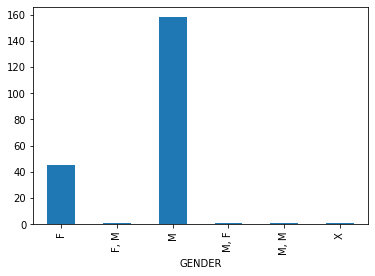

In [ ]:
author_gender = meta.groupby('GENDER')['AUTHOR'].nunique()
print(author_gender)
author_gender.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Number of authors by the number of their works included in the corpus

author_book = pd.DataFrame(meta['AUTHOR'].value_counts()).reset_index()
author_book.columns = ['author', 'counts']
author_book['counts'].value_counts()

1    123
3     44
2     39
Name: counts, dtype: int64

Narrative fiction        127
Drama                     74
Treatise                  55
Other                     37
Narrative non-fiction     27
LET                       13
Name: GENRE, dtype: int64


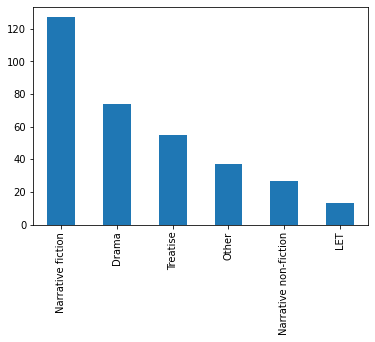

In [ ]:
genre_count = meta['GENRE'].value_counts()
print(genre_count)
genre_count.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

PERIOD
1710-1780    51
1780-1850    69
1850-1920    88
Name: AUTHOR, dtype: int64


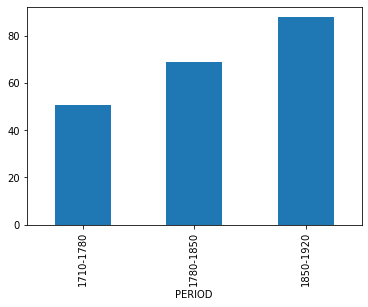

In [ ]:
author_period = meta.groupby('PERIOD')['AUTHOR'].nunique()
print(author_period)
author_period.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

GENRE                  GENDER
Drama                  M         59
                       F         15
LET                    M         10
                       F          2
                       F, M       1
Narrative fiction      M         85
                       F         40
                       M, F       1
                       M, M       1
Narrative non-fiction  M         23
                       F          4
Other                  M         28
                       F          6
                       X          3
Treatise               M         53
                       F          2
Name: GENDER, dtype: int64


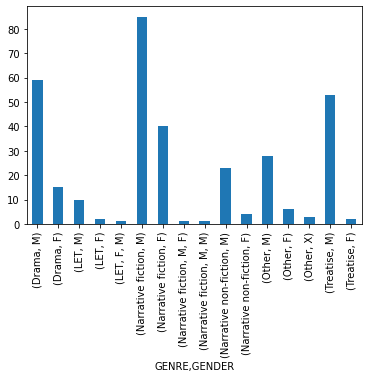

In [ ]:
genre_gender = meta.groupby('GENRE')['GENDER'].value_counts()
print(genre_gender)
genre_gender.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

                              n_tokens
GENRE                 GENDER          
Drama                 F         294593
                      M        1434571
LET                   F         312433
                      F, M      245621
                      M        2047335
Narrative fiction     F        5759641
                      M       12822590
                      M, F      116723
                      M, M       51063
Narrative non-fiction F         340726
                      M        5164891
Other                 F         309192
                      M        4410047
                      X        1817192
Treatise              F         183105
                      M        5038888


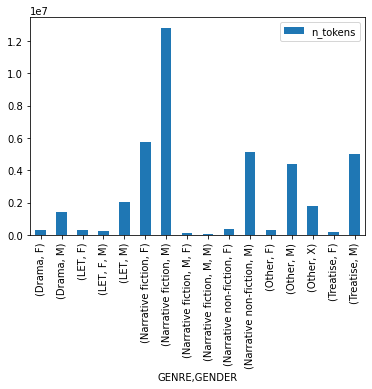

In [ ]:
ggt = meta.groupby(['GENRE', 'GENDER']).agg({'n_tokens': 'sum'})
print(ggt)
ggt.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
selected_df = meta.loc[(meta['GENRE'].isin(['Narrative fiction', 'Drama']))]

In [ ]:
selected_df = selected_df.loc[(selected_df['GENDER'].isin(['M', 'F']))]

In [ ]:
len(selected_df)

199

Narrative fiction    125
Drama                 74
Name: GENRE, dtype: int64


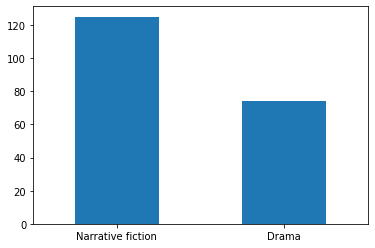

In [ ]:
genre_count = selected_df['GENRE'].value_counts()
print(genre_count)
genre_count.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

GENDER
F    37
M    78
Name: AUTHOR, dtype: int64


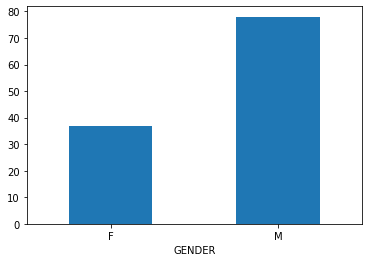

In [ ]:
author_gender = selected_df.groupby('GENDER')['AUTHOR'].nunique()
print(author_gender)
author_gender.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

                          n_tokens
GENRE             GENDER          
Drama             F         294593
                  M        1434571
Narrative fiction F        5759641
                  M       12822590


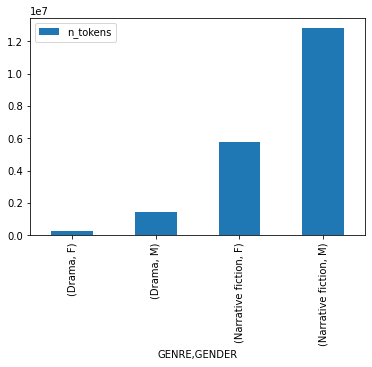

In [ ]:
ggt = selected_df.groupby(['GENRE', 'GENDER']).agg({'n_tokens': 'sum'})
print(ggt)
ggt.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

PERIOD
1710-1780    29
1780-1850    35
1850-1920    51
Name: AUTHOR, dtype: int64


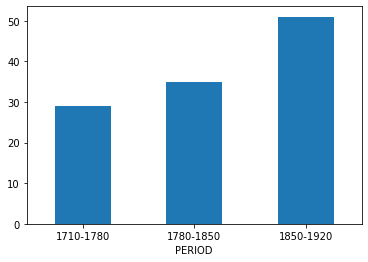

In [ ]:
author_period = selected_df.groupby('PERIOD')['AUTHOR'].nunique()
print(author_period)
author_period.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

                  n_tokens
PERIOD    GENDER          
1710-1780 F         915400
          M        5014723
1780-1850 F        2859915
          M        3245829
1850-1920 F        2278919
          M        5996609


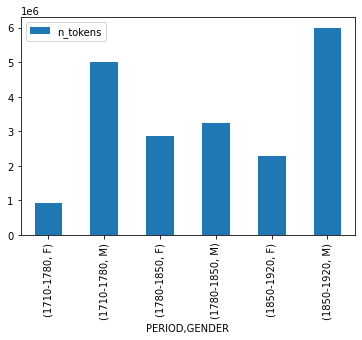

In [ ]:
pgt = selected_df.groupby(['PERIOD', 'GENDER']).agg({'n_tokens': 'sum'})
print(pgt)
pgt.plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sel_filenames = []

for filename in selected_df['FILE']:
  sel_filenames.append(filename)

frequencies = {}
for filename in filenames:
  filepath = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/clmet/corpus/txt/plain/' + filename
  with open(filepath, encoding='utf-8') as file:
    content = file.read()
    text = re.sub(r'\<.*?\>', "", content)
    for color in colors:
      word_count = text.lower().count(color)
      frequencies[color] = frequencies.get(color, 0) + word_count

In [ ]:
i = 1
for k in sorted(frequencies, key=frequencies.get, reverse=True):
  print(str(i) + ". " + k, frequencies[k])
  i += 1

1. red 178298
2. tan 100323
3. sea 27997
4. tea 26797
5. ash 18571
6. umber 13997
7. rust 10505
8. wood 10379
9. rose 10221
10. fire 9747
11. black 8573
12. white 8360
13. sage 8264
14. hot 7702
15. corn 7676
16. pine 7572
17. stone 6974
18. french 6920
19. gold 6338
20. green 5125
21. royal 4993
22. amber 4721
23. lime 4633
24. space 3850
25. army 3692
26. forest 3525
27. iron 3452
28. blue 3309
29. indian 3301
30. brown 3298
31. bread 3229
32. silver 3220
33. sky 2946
34. shadow 2818
35. snow 2098
36. olive 2047
37. anchor 1769
38. yellow 1759
39. smoke 1647
40. thunder 1604
41. seal 1478
42. baby 1475
43. barn 1457
44. cream 1376
45. teal 1361
46. harbour 1232
47. imperial 1208
48. plum 1186
49. coffee 1179
50. honey 1096
51. peru 1077
52. egyptian 1063
53. punch 1051
54. gray 1048
55. apple 991
56. burnt 987
57. clay 959
58. purple 949
59. wheat 912
60. fern 875
61. steel 842
62. brick 840
63. independence 825
64. jungle 824
65. persian 808
66. hunter 792
67. linen 774
68. african 

In [ ]:
adj_frequencies = {}
for filename in filenames:
  filepath = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/clmet/corpus/txt/pos/' + filename
  with open(filepath, encoding='utf-8') as file:
    content = file.read()
    text = re.sub(r'\<.*?\>', "", content)
    for token in text.split():
      try:
        word = re.split('_', token)[0].lower()
        pos = re.split('_', token)[1]
        if word in colors and pos == 'JJ':
          adj_frequencies[word] = frequencies.get(word, 0) + 1
      except IndexError:
        continue

In [ ]:
i = 1
for k in sorted(adj_frequencies, key=adj_frequencies.get, reverse=True):
  print(str(i) + ". " + k, adj_frequencies[k])
  i += 1

1. red 178299
2. tan 100324
3. umber 13998
4. rust 10506
5. wood 10380
6. black 8574
7. white 8361
8. hot 7703
9. stone 6975
10. french 6921
11. gold 6339
12. green 5126
13. royal 4994
14. amber 4722
15. lime 4634
16. iron 3453
17. blue 3310
18. indian 3302
19. brown 3299
20. silver 3221
21. olive 2048
22. yellow 1760
23. cream 1377
24. imperial 1209
25. plum 1187
26. coffee 1180
27. egyptian 1064
28. punch 1052
29. gray 1049
30. burnt 988
31. purple 950
32. wheat 913
33. persian 809
34. african 721
35. fossil 716
36. orange 704
37. pink 669
38. coral 645
39. electric 600
40. scarlet 576
41. turkish 562
42. crimson 558
43. pearl 549
44. ruby 524
45. peach 518
46. lemon 508
47. violet 439
48. ecru 358
49. ivory 322
50. byzantine 320
51. aqua 302
52. bronze 290
53. prussian 246
54. carnation 207
55. chocolate 205
56. mellow 200
57. mustard 177
58. cedar 170
59. azure 151
60. walnut 120
61. ultra 118
62. emerald 101
63. russet 100
64. tawny 90
65. pewter 88
66. lavender 73
67. indigo 61
6

In [ ]:
lemmatizer = WordNetLemmatizer()

## golbal variables
periods = list(selected_df.PERIOD.unique())

def get_wordnet_pos(tag):
  if tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
    return wordnet.VERB
  elif tag.startswith('N'):
    return wordnet.NOUN
  elif tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

def file_reader(fname: str):
  filepath = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/clmet/corpus/txt/pos/' + fname
  with open(filepath, encoding='utf-8') as file:
    content = file.read()
    text = re.sub(r'\<.*?\>', "", content)
    tokens = text.split()
    tokens = tokens[100:] # Ignoring the first 100 tokens as they normally contain the meta data
  return tokens

def lemmatize(tokens: list):
  lemmas, text = [], []
  for token in tokens:
    try:
      word = re.split('_', token)[0].lower()
      text.append(word)
      pos = re.split('_', token)[1]
      pos = get_wordnet_pos(pos)
      lemma = lemmatizer.lemmatize(word = word, pos = pos)
      lemmas.append(lemma)
    except IndexError:
      continue
  # lemma_string = ' '.join([str(lemma) for lemma in lemmas])
  # text_string = ' '.join([str(word) for word in text])
  return text, lemmas

def generate_output_file(period: str, df):
  out_filepath = 'gdrive/MyDrive/ColabNotebooks/NLP_Files/SharedFolder/CLS/Data/' + str(period) + '_final.csv'
  df.to_csv(out_filepath, sep=',', encoding='utf-8', index = False)
  return

def create_df(period: str, df = selected_df):
  new_df = df.loc[(df['PERIOD'] == period)]
  gg = new_df.groupby(['GENDER']).agg({'n_tokens': 'sum'})
  for idx, row in gg.iterrows():
    f_tokens = gg.at['F', 'n_tokens']
    m_tokens = gg.at['M', 'n_tokens']
    diff = (1 - (f_tokens / m_tokens)) # Since in all periods males have more tokens
  new_df["raw_text"], new_df["pos_text"], new_df["lemmas"] = "", "", ""
  for idx, row in new_df.iterrows():
    filename = row['FILE']
    tokens = file_reader(filename)
    if row['GENDER'] == 'M':
      begin_end = round((len(tokens) * diff) // 2)
      tokens = tokens[begin_end: -begin_end]
      new_df.at[idx, 'pos_text'] = tokens
      new_df.at[idx, 'raw_text'] = lemmatize(tokens)[0]
      new_df.at[idx, 'lemmas'] = lemmatize(tokens)[1]
    elif row['GENDER'] == 'F':
      new_df.at[idx, 'pos_text'] = tokens
      new_df.at[idx, 'raw_text'] = lemmatize(tokens)[0]
      new_df.at[idx, 'lemmas'] = lemmatize(tokens)[1]
  return new_df

def main():
  for period in periods:
    df = create_df(period)
    generate_output_file(period, df)
  return

In [ ]:
if __name__ == '__main__':
  main()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
